# ASSOCIATION RULES

## particularly focusing on market basket analysis and provide hands on experience

Suggesting or recomending products to customers at the basket stage

## Step1 : Data Acquisition

In [132]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
import plotly.graph_objects as go

In [133]:
from warnings import filterwarnings
filterwarnings("ignore")

### 1.1 Display setting

In [134]:
# adjust the display setting for rows and columns when working with pandas DataFrames

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

## Data Loading

In [135]:
df = pd.read_csv('online retails.csv')

In [136]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [137]:
# Load dataset
df = pd.read_csv('Online_retails.csv')

In [138]:
df

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9830,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
print(df.columns)

Index(['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'], dtype='object')


In [140]:
print(df.describe())

       citrus fruit semi-finished bread   margarine ready soups  Unnamed: 4 Unnamed: 5 Unnamed: 6     Unnamed: 7 Unnamed: 8     Unnamed: 9    Unnamed: 10 Unnamed: 11 Unnamed: 12    Unnamed: 13    Unnamed: 14    Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22   Unnamed: 23 Unnamed: 24    Unnamed: 25       Unnamed: 26 Unnamed: 27             Unnamed: 28 Unnamed: 29       Unnamed: 30 Unnamed: 31
count          9834                7675        6032        4733        3729       2874       2229           1684       1246            896            650         468         351            273            196            141          95          66          52          38          29          18          14             8           7              7                 6           5                       4           1                 1           1
unique          158                 151         155         152         150        137        138            140

<Axes: xlabel='Unnamed: 25'>

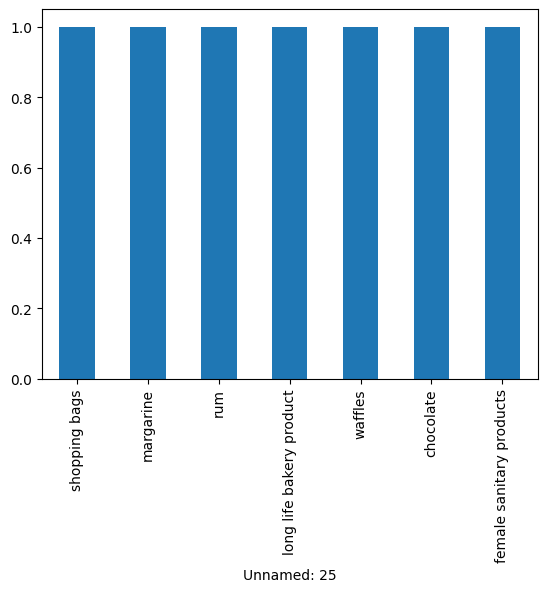

In [141]:
import matplotlib.pyplot as plt
df['Unnamed: 25'].value_counts().plot(kind='bar')

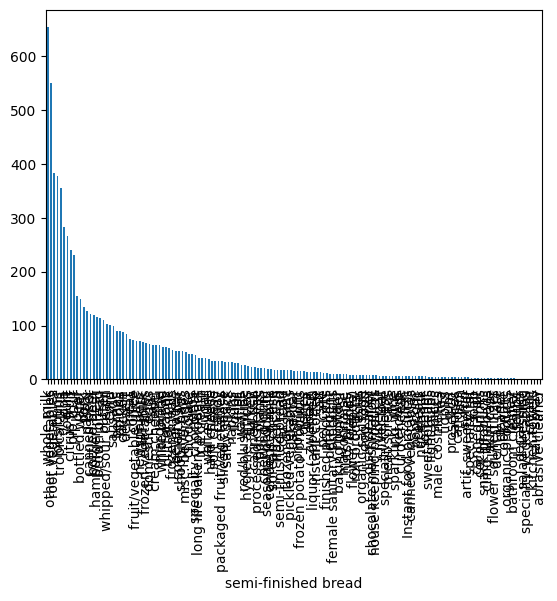

In [142]:
# Visualize data distribution
import matplotlib.pyplot as plt
df['semi-finished bread'].value_counts().plot(kind='bar')
plt.show()

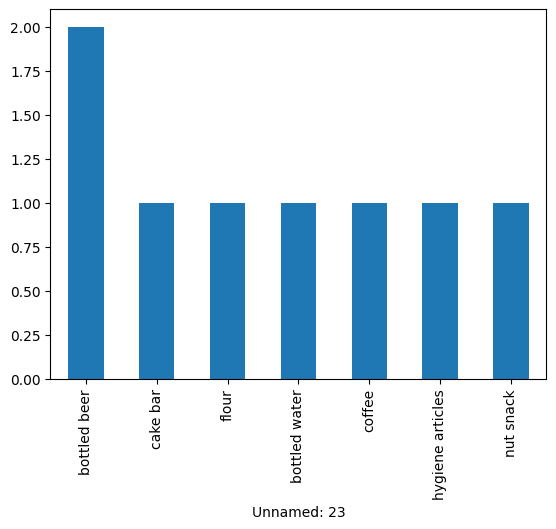

In [143]:
# Visualize data distribution
import matplotlib.pyplot as plt
df['Unnamed: 23'].value_counts().plot(kind='bar')
plt.show()

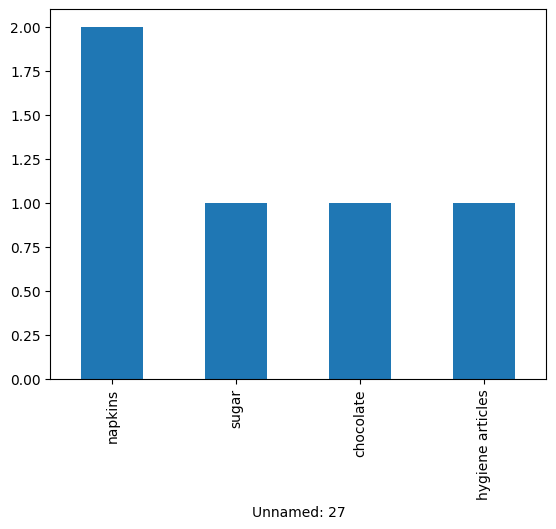

In [144]:
# Visualize data distribution
import matplotlib.pyplot as plt
df['Unnamed: 27'].value_counts().plot(kind='bar')
plt.show()

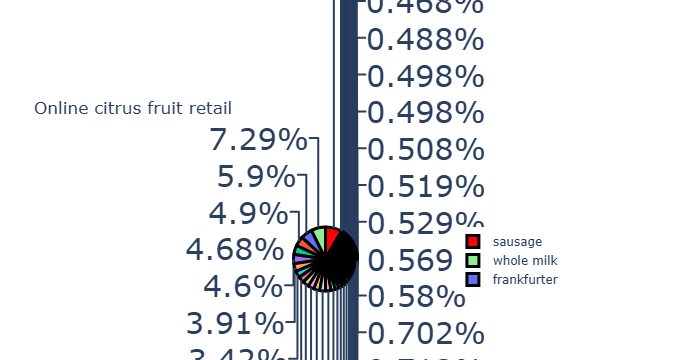

In [145]:
retails = df["citrus fruit"].value_counts()
label = retails.index
counts = retails.values
colors = ["red", "lightgreen"]
fig = go.Figure(data = [go.Pie(labels = label,values = counts)])
fig.update_layout(title_text = "Online citrus fruit retail")
fig.update_traces(hoverinfo = "label+value", textinfo = "percent", textfont_size = 30,
                 marker = dict(colors = colors, line = dict(color="black", width = 3)))

fig.show()

In [146]:
retails = df["citrus fruit"].value_counts()

In [147]:
retails

citrus fruit
sausage             825
whole milk          717
frankfurter         580
tropical fruit      482
other vegetables    460
                   ... 
dental care           1
hair spray            1
specialty fat         1
kitchen towels        1
flower (seeds)        1
Name: count, Length: 158, dtype: int64

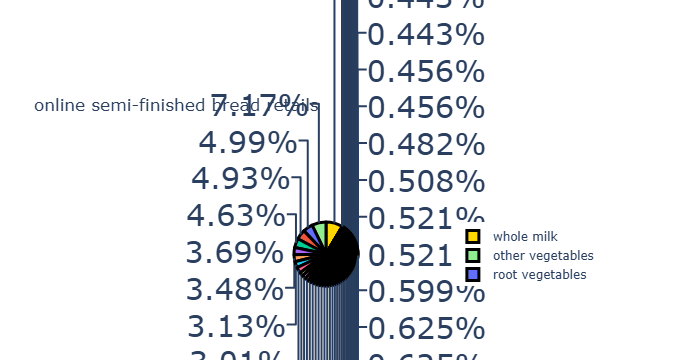

In [148]:
retails1 = df["semi-finished bread"].value_counts()
label = retails1.index
counts = retails1.values
colors = ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='online semi-finished bread retails')
fig.update_traces(hoverinfo='label+value', textinfo='percent',textfont_size = 30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))

fig.show()

In [149]:
retails1

semi-finished bread
whole milk              654
other vegetables        550
root vegetables         383
rolls/buns              378
tropical fruit          355
                       ... 
specialty vegetables      1
cream                     1
kitchen towels            1
hair spray                1
abrasive cleaner          1
Name: count, Length: 151, dtype: int64

In [150]:
retails1.index

Index(['whole milk', 'other vegetables', 'root vegetables', 'rolls/buns', 'tropical fruit', 'soda', 'yogurt', 'citrus fruit', 'pip fruit', 'beef',
       ...
       'honey', 'bathroom cleaner', 'soups', 'decalcifier', 'salad dressing', 'specialty vegetables', 'cream', 'kitchen towels', 'hair spray', 'abrasive cleaner'], dtype='object', name='semi-finished bread', length=151)

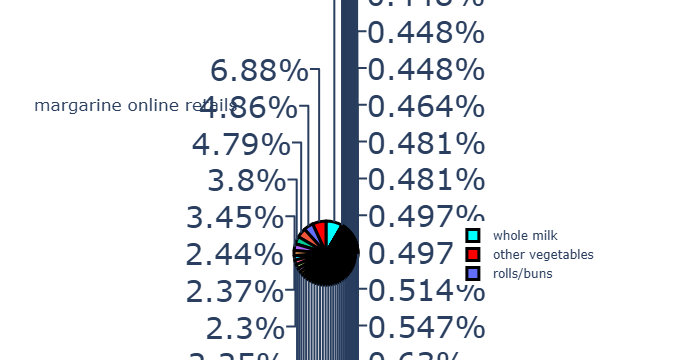

In [151]:
retails2 = "margarine"
retails2 = df[retails2].value_counts()
label = retails2.index
counts = retails2.values
colors = ['aqua', 'red']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='margarine online retails')
fig.update_traces(hoverinfo='label+value', textinfo='percent',textfont_size = 30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [152]:
retails2.index

Index(['whole milk', 'other vegetables', 'rolls/buns', 'yogurt', 'soda', 'root vegetables', 'pip fruit', 'tropical fruit', 'pastry', 'bottled water',
       ...
       'kitchen towels', 'bathroom cleaner', 'artif. sweetener', 'organic sausage', 'skin care', 'organic products', 'decalcifier', 'baby cosmetics', 'salad dressing', 'abrasive cleaner'], dtype='object', name='margarine', length=155)

In [153]:
retails2.count

<bound method Series.count of margarine
whole milk          506
other vegetables    415
rolls/buns          293
yogurt              289
soda                229
                   ... 
organic products      1
decalcifier           1
baby cosmetics        1
salad dressing        1
abrasive cleaner      1
Name: count, Length: 155, dtype: int64>

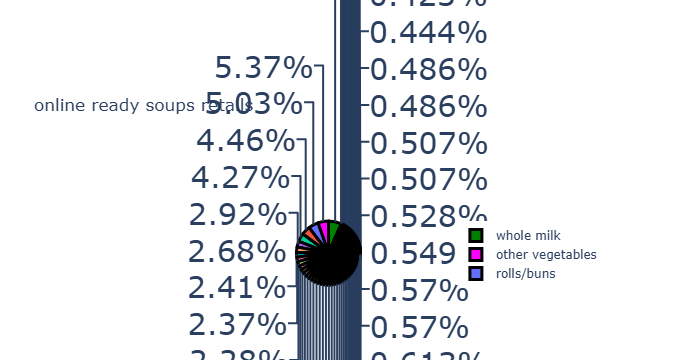

In [154]:
retails3 = "ready soups"
retails3 = df[retails3].value_counts()
label = retails3.index
counts = retails3.values
colors = ['green', 'magenta']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='online ready soups retails')
fig.update_traces(hoverinfo='label+value', textinfo='percent',textfont_size = 30,
                 marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [155]:
retails3.index

Index(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'pastry', 'whipped/sour cream', 'shopping bags', 'root vegetables',
       ...
       'toilet cleaner', 'cream', 'nut snack', 'decalcifier', 'canned fruit', 'organic products', 'tea', 'ham', 'brandy', 'nuts/prunes'], dtype='object', name='ready soups', length=152)

In [156]:
retails3.count

<bound method Series.count of ready soups
whole milk          315
other vegetables    254
rolls/buns          238
soda                211
yogurt              202
                   ... 
organic products      1
tea                   1
ham                   1
brandy                1
nuts/prunes           1
Name: count, Length: 152, dtype: int64>

2. Handle Missing Values

In [157]:
# Check for missing values
print(df.isnull().sum())

citrus fruit              0
semi-finished bread    2159
margarine              3802
ready soups            5101
Unnamed: 4             6105
Unnamed: 5             6960
Unnamed: 6             7605
Unnamed: 7             8150
Unnamed: 8             8588
Unnamed: 9             8938
Unnamed: 10            9184
Unnamed: 11            9366
Unnamed: 12            9483
Unnamed: 13            9561
Unnamed: 14            9638
Unnamed: 15            9693
Unnamed: 16            9739
Unnamed: 17            9768
Unnamed: 18            9782
Unnamed: 19            9796
Unnamed: 20            9805
Unnamed: 21            9816
Unnamed: 22            9820
Unnamed: 23            9826
Unnamed: 24            9827
Unnamed: 25            9827
Unnamed: 26            9828
Unnamed: 27            9829
Unnamed: 28            9830
Unnamed: 29            9833
Unnamed: 30            9833
Unnamed: 31            9833
dtype: int64


In [158]:
# Drop rows with missing values
df.dropna(inplace=True)

3. Remove Duplicates


In [159]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

4. Convert Data to Binary (Transaction) Format

In [160]:
# One-hot encoding for categorical variables
df_onehot = pd.get_dummies(df, columns=['citrus fruit', 'citrus fruit'])

In [161]:
# Convert to transaction format (0/1)
transactions = df_onehot.applymap(lambda x: 1 if isinstance(x, (int, float)) and x > 0 else 0)


5. Remove Irrelevant Columns


In [162]:
# Drop unnecessary columns
transactions.drop(['Unnamed: 29', 'Unnamed: 30'], axis=1, inplace=True)

6. Check Data Distribution


In [163]:
# Verify data distribution
print(transactions.describe())


       semi-finished bread  margarine  ready soups  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 31  citrus fruit_frankfurter  citrus fruit_frankfurter
count                  1.0        1.0          1.0         1.0         1.0         1.0         1.0         1.0         1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0          1.0                       1.0                       1.0
mean                   0.0        0.0          0.0         0.0         0.0         0.0         0.0         0.0         0.0        

7. Save Preprocessed Data


In [164]:
# Save preprocessed data to CSV
transactions.to_csv('preprocessed_data.csv', index=False)

In [165]:
from mlxtend.frequent_patterns import apriori, association_rules

In [166]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.1, use_colnames=True)

In [167]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [168]:
# Create transaction matrix
transaction_matrix = np.zeros((len(transactions), len('citrus fruit')))

In [169]:
# Print generated rules
print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


Data Preprocessing Summary


In [170]:
print("Data Preprocessing Summary:")
print("Rows:", len(df))
print("Columns:", len(df.columns))
print("Missing Values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum().sum())

Data Preprocessing Summary:
Rows: 1
Columns: 32
Missing Values: 0
Duplicates: 0


Preprocessed Data


In [171]:
print("Preprocessed Data:")
print(transactions.head())
print(transaction_matrix[:5])


Preprocessed Data:
      semi-finished bread  margarine  ready soups  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 31  citrus fruit_frankfurter  citrus fruit_frankfurter
1215                    0          0            0           0           0           0           0           0           0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0            0                         1                         1
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Association Rule Mining:


In [172]:
# Convert data to binary (0/1) format
transaction_matrix = transactions.applymap(lambda x: 1 if x > 0 else 0)

In [173]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_matrix, min_support=0.01, use_colnames=True)

In [174]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [175]:
# Set thresholds
min_support = 0.01
min_confidence = 0.5
min_lift = 1.5

In [176]:
# Filter rules
rules = rules[(rules['support'] >= min_support) &
             (rules['confidence'] >= min_confidence) &
             (rules['lift'] >= min_lift)]

In [177]:
# Print generated rules
print(rules)



Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


### Interview Questions:

1.	What is lift and why is it important in Association rules? 

In [211]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [212]:
# Load dataset
df = pd.read_csv('Online_retails.csv')

In [213]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [214]:
# Print rules with lift
print(rules)



Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


Why Lift is Important:


1. Identifies Strong Relationships: Lift helps identify rules with strong associations between items.
2. Filters Out Weak Rules: Lift filters out rules with weak or spurious associations.
3. Prioritizes Rules: Lift helps prioritize rules for further analysis or action.
4. Measures Correlation: Lift measures the correlation between items, helping identify patterns.
5. Business Insights: Lift provides actionable insights for marketing, sales, and product placement.



Interpretation:


- Lift > 1: Positive correlation (items occur together more often)
- Lift = 1: No correlation (items occur independently)
- Lift < 1: Negative correlation (items occur together less often)



Example:

Rule: {Bread} → {Butter} (Lift = 2.5)

- For every 100 customers buying Bread, 250 buy Butter.
- Strong association between Bread and Butter.



Benefits:

1. Improved marketing targeting
2. Enhanced product placement
3. Increased sales
4. Better customer understanding
5. Data-driven decision-making



Common Lift Thresholds:

- Low: 1-1.5 (weak association)
- Medium: 1.5-2.5 (moderate association)
- High: 2.5-5 (strong association)
- Very High: >5 (very strong association)

By analyzing lift, businesses can uncover valuable insights into customer behavior and make informed decisions to drive growth.

2.	What is support and Confidence. How do you calculate them?

Support and Confidence in Association Rules

Support:

Support measures the frequency of an itemset (or rule). It's calculated as:

Support = (Number of transactions containing itemset) / Total number of transactions

Confidence:

Confidence measures the reliability of a rule. It's calculated as:

Confidence = (Support of Antecedent & Consequent) / Support of Antecedent


Support Calculation:

Support(A) = 4/5 (Transactions 1, 2, 4, 5 contain A)
Support(A, B) = 2/5 (Transactions 1, 2 contain both A and B)
Support(B) = 4/5 (Transactions 1, 2, 3, 5 contain B)

Confidence Calculation:

Confidence(A → B) = Support(A, B) / Support(A) = 2/4 = 0.5

Interpretation:

- Support(A) = 0.8 (80% of transactions contain A)
- Support(A, B) = 0.4 (40% of transactions contain both A and B)
- Confidence(A → B) = 0.5 (50% of transactions with A also contain B)



In [218]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [219]:
# Load transaction data
df = pd.read_csv('Online_retails.csv')

In [ ]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [221]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [222]:
# Print rules with support and confidence
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


Tips:

- Adjust min_support and min_threshold parameters.
- Use other metrics (e.g., lift, conviction).
- Visualize rules using graph libraries (e.g., NetworkX).

3.	What are some limitations or challenges of Association rules mining?

In [237]:
#Load data
df = pd.read_csv('Online_retails.csv')

In [238]:
#Check for missing values
print(df.isnull().sum())

citrus fruit              0
semi-finished bread    2159
margarine              3802
ready soups            5101
Unnamed: 4             6105
Unnamed: 5             6960
Unnamed: 6             7605
Unnamed: 7             8150
Unnamed: 8             8588
Unnamed: 9             8938
Unnamed: 10            9184
Unnamed: 11            9366
Unnamed: 12            9483
Unnamed: 13            9561
Unnamed: 14            9638
Unnamed: 15            9693
Unnamed: 16            9739
Unnamed: 17            9768
Unnamed: 18            9782
Unnamed: 19            9796
Unnamed: 20            9805
Unnamed: 21            9816
Unnamed: 22            9820
Unnamed: 23            9826
Unnamed: 24            9827
Unnamed: 25            9827
Unnamed: 26            9828
Unnamed: 27            9829
Unnamed: 28            9830
Unnamed: 29            9833
Unnamed: 30            9833
Unnamed: 31            9833
dtype: int64


In [239]:
# Reduce data size using sampling
df_sample = df.sample(frac=0.1, random_state=42)

In [240]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

In [241]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [242]:
# Filter rules
rules_filtered = rules[rules['confidence'] > 0.7]

In [243]:
import networkx as nx
import matplotlib.pyplot as plt

In [246]:
# Create an empty directed graph
G = nx.DiGraph()

In [247]:
# Add edges from antecedents to consequents
for antecedent, consequent in zip(rules['antecedents'], rules['consequents']):
    G.add_edge(tuple(antecedent), tuple(consequent))

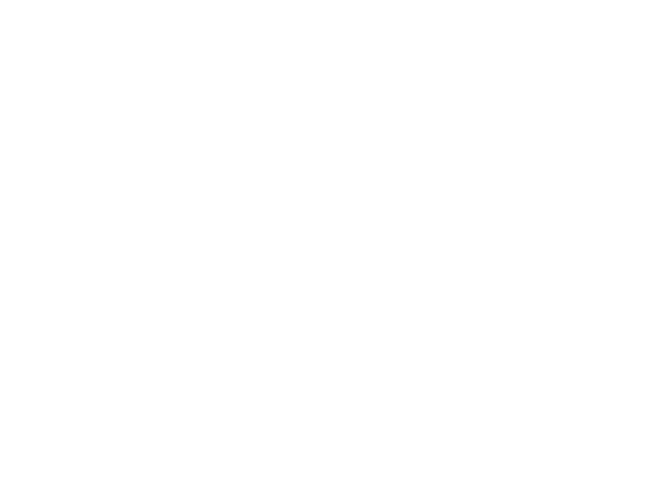

In [248]:
# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


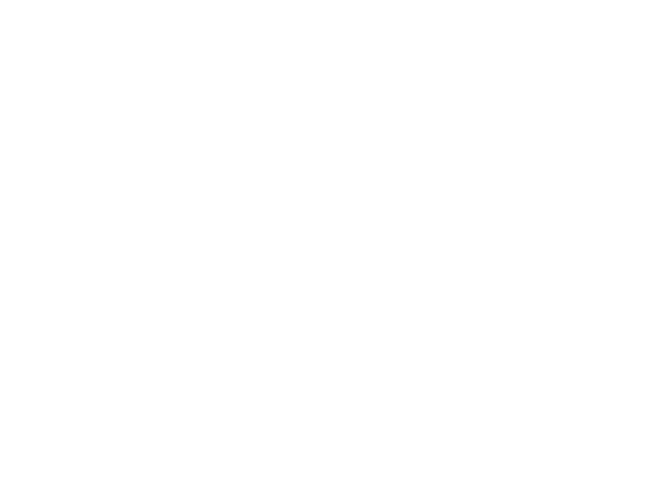

In [249]:
G = nx.DiGraph()
for antecedent, consequent in zip(rules['antecedents'], rules['consequents']):
    G.add_edge(tuple(antecedent), tuple(consequent))
nx.draw(G, with_labels=True)
plt.show()

